# affine maps（アフィン変換）

座標(x,y) を座標(u,v)に線形変換することにより
画像を拡大縮小、平行移動、回転、画像のリフト

### 例：https://imagingsolution.net/imaging/affine-transformation/
u = a1x + b1y + c1 \
v = a2x + b2y + c2

### 特徴
- 変換後も直線を保つ
- 平行を保ち、全ての点の相対的な位置順序は変更されない

通常、アフィン移動させる行列を計算で導くのは困難だが、getAffineTransform関数を使えば簡単に求めることができる

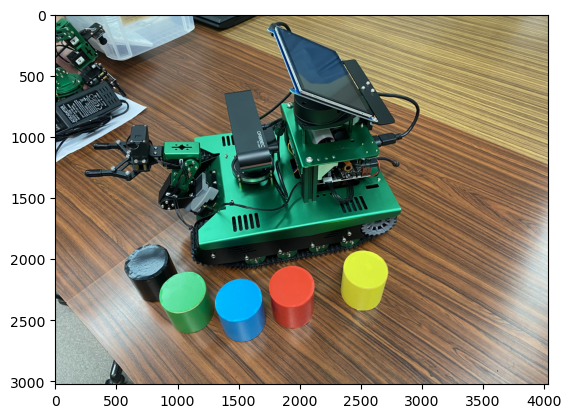

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('yahboom.jpg',1)

img_bgr2rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr2rgb)
plt.show()
# cv2.waitKey(0)

[[9.13420987e-01 8.26993053e-02 5.00000000e+01]
 [1.24038700e-02 9.17631492e-01 5.00000000e+01]]


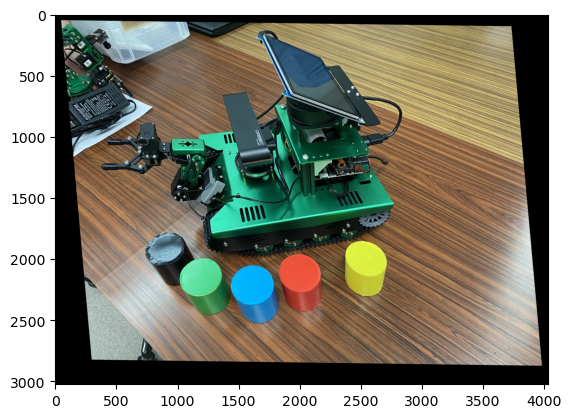

In [11]:
imgInfo = img.shape     # (height, width, color_channel)
height = imgInfo[0]
width = imgInfo[1]

matSrc = np.float32([[0,0], [0,height-1], [width-1,0]])     # 変換させたい3点を指定(左上、左下、右上)
matDst = np.float32([[50,50], [300,height-200], [width-300,100]])       # それぞれの点をどこに移動させるかを指定

# Combine
matAffine = cv2.getAffineTransform(matSrc, matDst)   # matSrcの点をmatDstの点に移動させる変換行列を作成
print(matAffine)    # 変換行列を表示
dst = cv2.warpAffine(img, matAffine, (width,height))    # 作成した変換行列を用いて画像を変換 (第三引数は出力画像のサイズ)

img_bgr2rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)    # BGR(OpenCV) -> RGB(Pillow)

plt.imshow(img_bgr2rgb)
# plt.imshow(dst)